- 32회 시험에서는 전처리가 복잡했던 것이 특징, 동형모의고사이며 실제 시험 문제와는 다릅니다.      
    저작권은 datamanim에 있으면 외부유출 및 공개 블로그 깃 등에 업로드를 금지합니다.
- 실제 시험에서는 문제 표기 없습니다.
- 데이터를 코드랑 같은 경로로 위치시켜야 합니다.
- 풀이영상을 보기 전에 4시간 동안 시간을 따로 내어 풀어본 후에 보시길!

# 32회 ADP 복원 

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption?resource=download 후처리
- 데이터 링크 : ./data/32/adp32_p1.csv
- 데이터 설명 : 시간대별 발전량에 대한 데이터이다


## 전처리 규칙
- 파생변수 ind11칼럼의 값이 1인 데이터만 훈련에 사용할 것, ind22칼럼의 값이 1인 데이터만 테스트에 사용할 것
- 모든 모델링은 그리드서치를 통해서 최적 파라미터를 산출할 것 (각 모델의 파라미터는 3개 이하로)

In [3]:
import pandas as pd 
df = pd.read_csv("./data/32/adp32_p1.csv")
df.head()

,date,Kwh,LaCR,LeCR,co2,LaF,LeF
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0


## 1-1  date 컬럼을 이용하여 3개의 파생변수를 만들어라
- 1. month : 해당 시각의 월 정보
- 2. day : 해당 시각의 일자 정보, 일요일-0, 월요일-1 ~ 토요일-6
- 3. nsd : 해당 시각의 일자의 자정으로부터 소요된 총 분(minute)

In [44]:
df['date'] = pd.to_datetime(df['date'],format = '%d/%m/%Y %H:%M')
df['month'] = df['date'].dt.month
df['day'] = (df['date'].dt.day_of_week +1) % 7
df['nsd'] = df['date'].dt.minute + df['date'].dt.hour * 60
display(df.head())
print('month','day','nsd','를 추가했다')

,date,Kwh,LaCR,LeCR,co2,LaF,LeF,month,day,nsd,ind11,ind22
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,1,1,15,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1,1,30,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,1,1,45,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,1,1,60,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,1,1,75,1,0


month day nsd 를 추가했다


## 1-2 아래 기준으로 두개의 파생변수를 추가하라
- 파생변수명(ind11) : month, day, nsd 컬럼의 합이 11의 배수이고 22의 배수가 아니라면 1의 값 그 외는 0의 값
- 파생변수명(ind22) : month, day, nsd 컬럼의 합이 22의 배수라면 1의 값 그 외는 0의 값

In [45]:
df['ind11'] = (((df['month'] + df['day'] + df['nsd']) % 11 ==0) & ((df['month'] + df['day'] + df['nsd']) % 22 != 0)).astype('int')
df['ind22'] = ((df['month'] + df['day'] + df['nsd']) % 22 ==0).astype('int')
display(df.head())
print('ind11과 ind22를 추가했다.')
pd.crosstab(df['ind11'],df['ind22'])

,date,Kwh,LaCR,LeCR,co2,LaF,LeF,month,day,nsd,ind11,ind22
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,1,1,15,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1,1,30,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,1,1,45,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,1,1,60,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,1,1,75,1,0


ind11과 ind22를 추가했다.


ind22,0,1
ind11,,
0,31858,1583
1,1599,0


## 1-3 아래 기준으로 한개의 파생변수를 추가하라
- 파생변수명(Kwh8) : Kwh컬럼의 값이 4.1 초과일 경우 1 그 외 0

In [49]:
df['Kwh8'] = df['Kwh'].map(lambda x : 1 if x >4.1 else 0)
display(df['Kwh8'].value_counts().to_frame())
print('Kwh8의 분포는 위와 같다')

,Kwh8
1,18815
0,16225


Kwh8의 분포는 위와 같다


## 1-4 전처리 완료한 데이터를 기준으로 EDA를 실시하라 (시각화 포함)

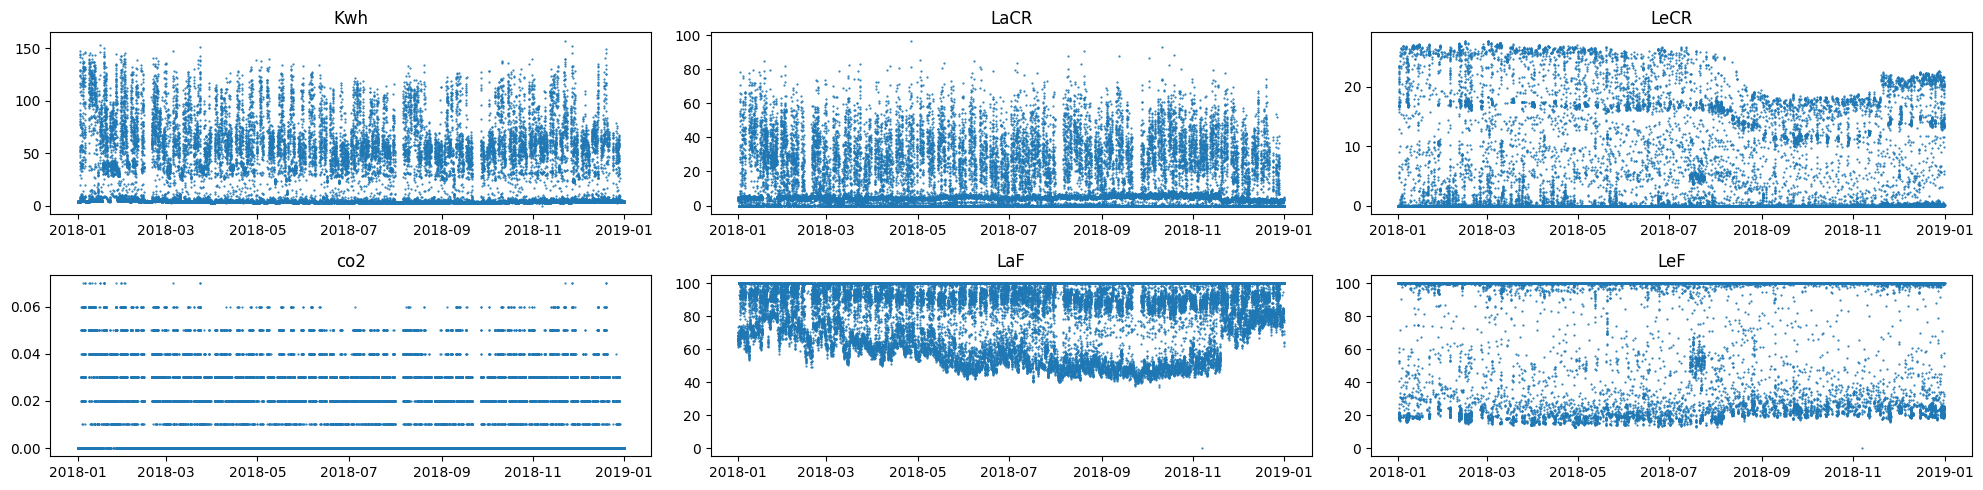


독립변수들의 시계열 산점도를 그렸다. 시계열적 특성은 보이지 않으나. 18년 8월, 9월말에 비어있는 구간이 있는 것처럼 보인다.
LeCR 18년 9~12월 기간은 타 기간에 비해 상대적으로 낮은 수치를 보인다.



In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


fig,axes = plt.subplots(2,3,figsize=(20,5))
for i,ax in enumerate(axes.flat):
    target_df = df[['date',df.columns[1:][i]]]
    ax.scatter(x = target_df['date'],y= target_df[df.columns[1:][i]],s=0.3)
    ax.set_title(df.columns[1:][i])
    
fig.tight_layout()
plt.show()

print('''
독립변수들의 시계열 산점도를 그렸다. 시계열적 특성은 보이지 않으나. 18년 8월, 9월말에 비어있는 구간이 있는 것처럼 보인다.
LeCR 18년 9~12월 기간은 타 기간에 비해 상대적으로 낮은 수치를 보인다.
''')

## 1-5 Kwh8를 종속 변수로 하여(Kwh제거) 분류 모델을 학습하고 평가하라. 서포트벡터머신과 랜덤포레스트를 사용하라. confusionmatrix를 해석하라

파생변수 ind11칼럼의 값이 1인 데이터만 훈련에 사용할 것, ind22칼럼의 값이 1인 데이터만 테스트에 사용할 것    
모든 모델링은 그리드서치를 통해서 최적 파라미터를 산출할 것 (각 모델의 파라미터는 3개 이하로)

In [67]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

train = df[df.ind11 ==1]
test = df[df.ind22 ==1]


train_x = train.drop(columns = ['Kwh','Kwh8','date'])
train_y = train['Kwh8']

test_x = test.drop(columns = ['Kwh','Kwh8','date'])
test_y = test['Kwh8']


def rf_modeling(train_x,train_y):
    rf = RandomForestClassifier(random_state=123)
    param_grid = {
        'n_estimators':[100,10],
        'min_samples_split':[2,5],
        'min_samples_leaf':[1,3],
    }
    
    grid_search = GridSearchCV(rf,param_grid , refit=True,cv =3)
    grid_search.fit(train_x,train_y)
    return grid_search
    
def svc_modeling(train_x,train_y):
    
    
    svc = SVC()
    param_grid = {
        'svc__C':[1,10],
        'svc__kernel':['linear','rbf'],
        'svc__tol':[0.001,0.01],
    }
    
    pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    
    grid_search = GridSearchCV(pipeline,param_grid , refit=True,cv =3)
    grid_search.fit(train_x,train_y)
    return grid_search    
    
    
rf = rf_modeling(train_x,train_y)
svc = svc_modeling(train_x,train_y)

In [81]:
rf_pred = rf.predict(test_x)
svc_pred = svc.predict(test_x)

rf_confusion = pd.DataFrame(confusion_matrix(test_y,rf_pred),index = ['0_true','1_true'],columns =['0_guess','1_guess'])
rf_result_accuracy = accuracy_score(test_y,rf_pred)
rf_confusion.columns.name =f'RandomForest accuracy : {round(rf_result_accuracy,3)}'

svc_confusion = pd.DataFrame(confusion_matrix(test_y,svc_pred),index = ['0_true','1_true'],columns =['0_guess','1_guess'])
svc_result_accuracy = accuracy_score(test_y,svc_pred)
svc_confusion.columns.name =f'SVC accuracy : {round(svc_result_accuracy,3)}'

display(rf_confusion)
display(svc_confusion)

print('''
    랜덤포레스트의 경우 모델정확도는 0.95로 0.939값을 가지는 서포트 벡터머신보다 높은 정확도를 보이며, confusion maxtrix의 결과는 위와 같다.
''')

RandomForest accuracy : 0.95,0_guess,1_guess
0_true,707,22
1_true,57,797


SVC accuracy : 0.939,0_guess,1_guess
0_true,702,27
1_true,69,785



    랜덤포레스트의 경우 모델정확도는 0.95로 0.939값을 가지는 서포트 벡터머신보다 높은 정확도를 보이며, confusion maxtrix의 결과는 위와 같다.



## 1-6 Kwh를 종속 변수로 하여(Kwh8 제거) 회귀 모델을 학습하고 평가하라. 서포트벡터머신과 랜덤포레스트를 사용하라

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

train = df[df.ind11 ==1]
test = df[df.ind22 ==1]
train_x = train.drop(columns = ['Kwh','Kwh8','date'])
train_y = train['Kwh']
test_x = test.drop(columns = ['Kwh','Kwh8','date'])
test_y = test['Kwh']


def rf_modeling(train_x,train_y):
    rf = RandomForestRegressor(random_state=123)
    param_grid = {
        'n_estimators':[100,10],
        'min_samples_split':[2,5],
        'min_samples_leaf':[1,3],
    }
    
    grid_search = GridSearchCV(rf,param_grid , refit=True,cv =3)
    grid_search.fit(train_x,train_y)
    return grid_search
    
def svr_modeling(train_x,train_y):
    svr = SVR()
    param_grid = {
        'svr__C':[1,10],
        'svr__kernel':['linear','rbf'],
        'svr__tol':[0.001,0.01],
    }
    
    pipeline = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])
    
    grid_search = GridSearchCV(pipeline,param_grid , refit=True,cv =3)
    grid_search.fit(train_x,train_y)
    return grid_search    
    
    
rf = rf_modeling(train_x,train_y)
svr = svr_modeling(train_x,train_y)
rf_pred = rf.predict(test_x)
svr_pred = svr.predict(test_x)


from sklearn.metrics import mean_squared_error
rf_mse = mean_squared_error(test_y, rf_pred)
svr_mse = mean_squared_error(test_y, svr_pred)

print(f'''
랜덤포레스트의 mse값은 {round(rf_mse)}이고 서포트 백터머신의 mse값은 {round(svr_mse)}이므로 랜덤포레스트의 성능이 더 좋은 것을 확인할 수 있다
''')


랜덤포레스트의 mse값은 8이고 서포트 백터머신의 mse값은 24이므로 랜덤포레스트의 성능이 더 좋은 것을 확인할 수 있다



## 1-7 아래 두 조건으로 각각 데이터를 추출하여 회귀 모델링을 하고 1-6과 성능을 비교하라
- Kwh8 값이 1인 데이터만 추출 후 Kwh8 컬럼 제거
- Kwh8 값이 0인 데이터만 추출 후 Kwh8 컬럼 제거

In [107]:
df_filter_one = df[df['Kwh8'] ==1]
df_filter_zero = df[df['Kwh8'] ==0]

def total_model(df):
    train = df[df.ind11 ==1]
    test = df[df.ind22 ==1]
    train_x = train.drop(columns = ['Kwh','Kwh8','date'])
    train_y = train['Kwh']
    test_x = test.drop(columns = ['Kwh','Kwh8','date'])
    test_y = test['Kwh']


    def rf_modeling(train_x,train_y):
        rf = RandomForestRegressor(random_state=123)
        param_grid = {
            'n_estimators':[100,10],
            'min_samples_split':[2,5],
            'min_samples_leaf':[1,3],
        }

        grid_search = GridSearchCV(rf,param_grid , refit=True,cv =3)
        grid_search.fit(train_x,train_y)
        return grid_search

    def svr_modeling(train_x,train_y):
        svr = SVR()
        param_grid = {
            'svr__C':[1,10],
            'svr__kernel':['linear','rbf'],
            'svr__tol':[0.001,0.01],
        }

        pipeline = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])

        grid_search = GridSearchCV(pipeline,param_grid , refit=True,cv =3)
        grid_search.fit(train_x,train_y)
        return grid_search    


    rf = rf_modeling(train_x,train_y)
    svr = svr_modeling(train_x,train_y)
    rf_pred = rf.predict(test_x)
    svr_pred = svr.predict(test_x)

    from sklearn.metrics import mean_squared_error
    rf_mse = mean_squared_error(test_y, rf_pred)
    svr_mse= mean_squared_error(test_y, svr_pred)
    
    return rf_mse , svr_mse



rf_mse_one,svr_mse_one = total_model(df_filter_one)
rf_mse_zero,svr_mse_zero = total_model(df_filter_zero)
result_df = pd.DataFrame()
result_df.index = ['랜덤포레스트','서포트벡터머신']
result_df['Kwh8 ==1'] = [round(rf_mse_one,2),round(svr_mse_one,2)]
result_df['Kwh8 ==0'] = [round(rf_mse_zero,2),round(svr_mse_zero,2)]
result_df.columns.name ='mse'
display(result_df)
print('kwh8 ==0 인 경우가 1인 경우보다 더 좋은 모델 결과를 보였다. 두 경우 모두 랜덤포레스트가 서포트 벡터머신보다 좋은 결과를 보였다.')

mse,Kwh8 ==1,Kwh8 ==0
랜덤포레스트,14.87,0.02
서포트벡터머신,39.55,0.04


kwh8 ==0 인 경우가 1인 경우보다 더 좋은 모델 결과를 보였다. 두 경우 모두 랜덤포레스트가 서포트 벡터머신보다 좋은 결과를 보였다.


## 데이터 설명
- 데이터 출처 : https://www.data.go.kr/data/15126430/fileData.do 후처리 + 자체제작
- 데이터 링크 : 
    - ./data/32/adp32_p2.csv
    - ./data/32/adp32_p2_sub.csv
- 데이터 설명 : 
    - 두가지 데이터이다. 
    - adp32_p2.csv : J시의 4개의 발전기의 시간당 발전용량에 대한 정보이다.
    - adp32_p2_sub.csv : J시의 시간별 계절성 정보 데이터이다.

In [109]:
import pandas as pd
pd.set_option('display.max_columns',400)

In [110]:
p = pd.read_csv('./data/32/adp32_p2.csv')
weather = pd.read_csv('./data/32/adp32_p2_sub.csv')
display(p.head())
display(weather.head())

,발전기명,일자,설비용량,0시,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,a,2020-01-01,263.225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180,12.730,51.490,96.160,131.460,146.450,135.970,93.280,53.840,21.630,5.690,4.610,4.270,1.330,0.530,0.0,0.0
1,b,2020-01-01,245.725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178,12.599,54.979,92.596,130.718,154.674,135.644,88.250,51.059,22.283,5.244,4.183,3.848,1.290,0.564,0.0,0.0
2,c,2020-01-01,254.425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179,13.229,47.722,98.584,135.693,136.897,146.557,90.641,50.344,22.072,5.652,4.495,4.089,1.240,0.526,0.0,0.0
3,d,2020-01-01,250.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176,13.193,55.270,104.731,131.502,158.010,139.809,86.995,51.953,21.831,6.149,4.666,4.141,1.228,0.491,0.0,0.0
4,a,2020-01-02,263.225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.520,16.190,37.970,53.230,33.570,33.120,36.400,39.000,25.860,8.310,4.090,0.730,1.070,0.390,0.020,0.0,0.0


,일시,기온,강수량(mm),습도,적설(cm),전운량(10분위),일조(hr),일사량
0,2020-01-01 00:00,2.4,NaN,63.0,0.0,9,0.0,0.0
1,2020-01-01 01:00,2.6,0.0,63.0,0.0,9,0.0,0.0
2,2020-01-01 02:00,2.7,0.0,68.0,0.0,9,0.0,0.0
3,2020-01-01 03:00,3.2,0.0,69.0,0.0,9,0.0,0.0
4,2020-01-01 04:00,3.0,0.0,65.0,0.0,9,NaN,0.0


## 2-1 아래 조건들을 참고하여 전처리를 시행하라
- 계절성 정보 데이터 중 강수량과 일조량의 결측치를 0으로 채워라
- 계절성 정보 데이터 중 기온은 직전시간과 직후시간의 기온의 평균값으로 결측치를 대치하라
- 계절성 정보데이터와 발전용량 데이터를 머지하라.
    - 계절성 정보데이터의 일자,시각을 기준으로 한다.
    - 계절성 정보데이터에 발전기명, 설비용량, 발전량 컬럼을 추가한다.
    
    
<img src ='data/32/result.png' width='800' height='200'/>

In [145]:
weather['강수량(mm)'] = weather['강수량(mm)'].fillna(0)
weather['일조(hr)'] = weather['일조(hr)'].fillna(0)
weather['기온'] = weather['기온'].combine_first((weather['기온'].fillna(method ='bfill') + weather['기온'].fillna(method ='ffill')) /2)
weather['일시'] = pd.to_datetime(weather['일시'])

In [174]:
# p데이터의 시간컬럼을 일자컬럼에 넣어서 한 번의 전처리를 우선시행 -> 계절성 데이터와 머지

# melt
p_melt = p.melt(['발전기명','일자','설비용량']).rename(columns ={'variable': '시각','value':'발전량'})
p_melt['일시'] = pd.to_datetime(p_melt['일자'] + ' ' + p_melt['시각'].str.replace('시','').str.zfill(2))
p_melt = p_melt.drop(columns =['일자','시각'])
p_melt = p_melt[['발전기명','설비용량','발전량','일시']]
merge_df = pd.merge(p_melt,weather,on='일시')




# for 
lst = []
for hour in range(24):
    target_df = p[['발전기명','일자','설비용량',f'{hour}시']].copy()
    target_df.loc[:,'일시'] = pd.to_datetime(target_df['일자'] + ' ' + str(hour).zfill(2))
    target_df = target_df.rename(columns ={f'{hour}시':'발전량'})
    target_df = target_df.drop(columns =['일자'])[['발전기명','설비용량','발전량','일시']]
    lst.append(target_df)

p_merge = pd.concat(lst).reset_index(drop=True)
merge_df = pd.merge(p_merge,weather,on='일시')

## 2-2 전처리 데이터를 기준으로 아래 조건으로 train,test 데이터를 나눈다. 데이터 분리 후 train 데이터의 기초 통계량을 확인하라
- a발전기의 12시~18시의 데이터만 모델링에 사용한다. 
- 2020년도, 2021년도는 train, 2022년도는 test 데이터로 사용한다

In [189]:
import os
if os.name == 'posix': # Mac 0S
    plt.rc("font", family="AppleGothic")
else : # 그 외
    plt.rc("font", family="Malgun Gothic")
    
plt.rcParams['axes.unicode_minus'] = False    

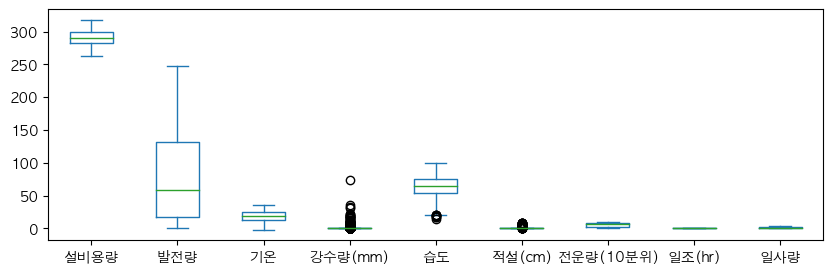

,count,mean,std,min,25%,50%,75%,max
설비용량,5110.0,290.191007,14.075334,263.225,282.355,289.6985,299.6970,318.119
발전량,5110.0,78.277661,67.321926,0.030,17.890,58.8600,131.5250,247.560
기온,5110.0,18.723386,7.671290,-2.000,12.800,19.1000,24.7000,35.600
강수량(mm),5110.0,0.206419,1.762871,0.000,0.000,0.0000,0.0000,74.600
습도,5110.0,65.166928,15.126223,14.000,54.000,65.0000,76.0000,100.000
적설(cm),5110.0,0.027926,0.392822,0.000,0.000,0.0000,0.0000,8.800
전운량(10분위),5110.0,5.985519,3.686239,0.000,2.000,7.0000,9.0000,10.000
일조(hr),5110.0,0.497162,0.440233,0.000,0.000,0.5000,1.0000,1.000
일사량,5110.0,1.413086,1.054632,0.000,0.470,1.2100,2.2875,3.690



강수량과 습도,적설이 이상치가 존재한다.



In [199]:
modeling_df = merge_df[(merge_df['발전기명'] =='a') & (merge_df['일시'].dt.hour.isin(range(12,19)))].reset_index(drop=True)
modeling_train = modeling_df[modeling_df['일시'].dt.year.isin([2020,2021])].reset_index(drop=True)
modeling_test = modeling_df[modeling_df['일시'].dt.year.isin([2022])].reset_index(drop=True)


fig,ax = plt.subplots(figsize=(10,3))
modeling_train.drop(columns =['발전기명','일시']).plot(kind='box',ax=ax)
plt.show()

display(modeling_train.describe().T)
print('''
강수량과 습도,적설이 이상치가 존재한다.
''')

## 2-3 train 데이터 세트의 발전량과 나머지 변수간의 상관관계를 확인하라


In [210]:
display(modeling_train.drop(columns =['발전기명','일시']).corr()[['발전량']].sort_values('발전량')[:-1])
print('전운량이 가장 큰 음의 상관관계를 보이고 일사량이 가장 큰 양의 상관관계를 보인다.')

,발전량
전운량(10분위),-0.484490
습도,-0.383281
강수량(mm),-0.099701
적설(cm),-0.067622
설비용량,-0.020767
기온,0.117670
일조(hr),0.598131
일사량,0.857487


전운량이 가장 큰 음의 상관관계를 보이고 일사량이 가장 큰 양의 상관관계를 보인다.


## 2-4 발전량을 종속변수로 하여 2개의 회귀모델링을 진행하고 모델을 평가하라

In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(random_state=123)
lr = LinearRegression()

train_x = modeling_train.drop(columns =['발전기명','발전량','일시'])
train_y = modeling_train['발전량']

test_x = modeling_test.drop(columns =['발전기명','발전량','일시'])
test_y = modeling_test['발전량']


rf.fit(train_x,train_y)
lr.fit(train_x,train_y)

rf_predict = rf.predict(test_x)
lr_predict = lr.predict(test_x)

rf_mse = mean_squared_error(test_y , rf_predict)
lr_mse = mean_squared_error(test_y , lr_predict)

print(f'''
랜덤포레스트의 mse값은 {round(rf_mse,3)}이고 선형회귀의 mse값은 {round(lr_mse,3)}이다. 랜덤포레스트가 성능이 더 좋은 것을 확인했다.
''')


랜덤포레스트의 mse값은 1256.064이고 선형회귀의 mse값은 1349.728이다. 랜덤포레스트가 성능이 더 좋은 것을 확인했다.



# 통계 (40점)

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset 후처리
- 데이터 링크 : ./data/32/adp32_s1.csv
- 데이터 설명 : 보스턴 집값 관련 데이터
    - MEDV (집값): 종속변수

In [221]:
df = pd.read_csv('./data/32/adp32_s1.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT1,LSTAT2,MEDV
0,0.00632,18.0,2.31,0.0,0.538,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,5.0520,24.0
1,0.02731,0.0,7.07,0.0,0.469,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,9.4440,21.6
2,0.02729,0.0,7.07,0.0,0.469,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,3.8970,34.7
3,0.03237,0.0,2.18,0.0,0.458,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2.9410,33.4
4,0.06905,0.0,2.18,0.0,0.458,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,5.4075,36.2


## 3-1 기본 회귀가정을 검토하라

In [ ]:
# 선형성
# 독립성
# 등분산성
# 정규성

In [270]:
import statsmodels.api as sm

X = df.drop(columns =['MEDV'])
y = df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     87.03
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          2.09e-118
Time:                        01:00:27   Log-Likelihood:                -1538.2
No. Observations:                 506   AIC:                             3104.
Df Residuals:                     492   BIC:                             3164.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4437      3.888     17.860      0.000      61.804      77.083
CRIM          -0.1181      0.036     -3.288      0.001      -0.189      -0.048
ZN             0.0657      0.015      4.483      0.000       0.037       0.095
INDUS         -0.0313      0.066     -0.472      0.637      -0.161       0.099
CHAS           2.9475      0.932      3.164      0.002       1.117       4.778
NOX          -20.9226      4.118     -5.081      0.000     -29.014     -12.832
AGE            0.0257      0.014      1.836      0.067      -0.002       0.053
DIS           -1.7140      0.214     -8.011      0.000      -2.134      -1.294
RAD            0.4019      0.071      5.675      0.000       0.263       0.541
TAX           -0.0148      0.004     -3.660      0.000      -0.023      -0.007
PTRATIO       -1.1462      0.140     -8.197      0.000      -1.421      -0.871
B              0.0068      0.003      2.340      0.020       0.001       0.012
LSTAT1        -0.5449      0.557     -0.978      0.329      -1.640       0.550
LSTAT2        -0.2274      0.556     -0.409      0.683      -1.319       0.865
==============================================================================
Omnibus:                      126.656   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.364
Skew:                           1.281   Prob(JB):                     1.63e-65
Kurtosis:                       5.754   Cond. No.                     1.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

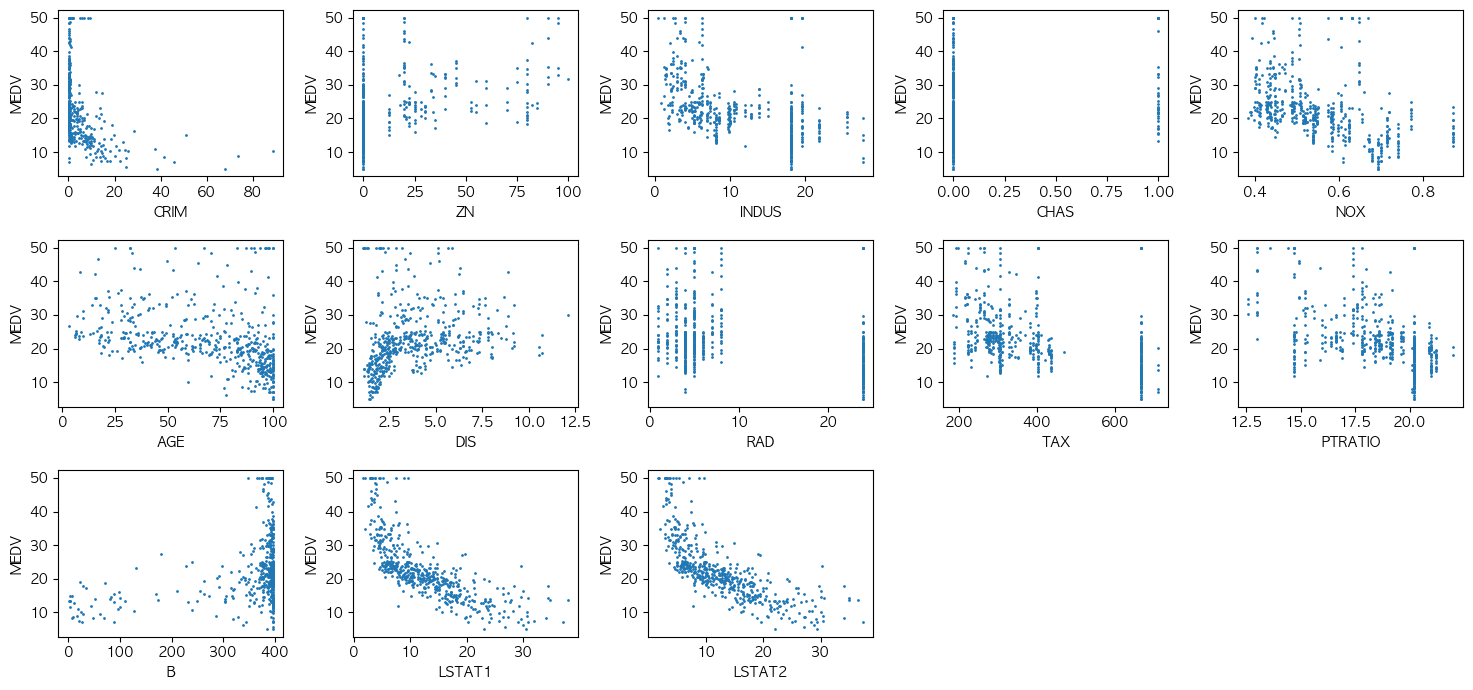

In [271]:
fig,axes = plt.subplots(3,5,figsize=(15,7))

for i ,ax in enumerate(axes.flat[:-2]):
    ax.scatter(df[df.columns[i]],df['MEDV'],s=1)
    ax.set_xlabel(str(df.columns[i]))
    ax.set_ylabel('MEDV')
    
fig.tight_layout()

fig.delaxes(axes.flat[-1])
fig.delaxes(axes.flat[-2])
plt.show()

In [272]:
# 독립성  durbin_watson
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid) # 0~4사이의 값을 가지며 2에 가까울수록 자기상관이 없음(독립)

# 독립이 아니다.

1.2456130251693067

In [274]:
# 등분산성 breusch-pagan 
# 귀무가설 : 잔차의 분산이 일정하다 (등분산이다.)

import statsmodels.stats.api as sms

static , pvalue, f_static , f_pv = sms.het_breuschpagan(model.resid,model.model.exog)
print(pvalue)
# 등분산이 아니다! 

1.6419500179631268e-06


In [276]:
# 정규성 - shapiro
# 귀무가설 : 정규성을 따른다

from scipy.stats import shapiro
static ,pv = shapiro(model.resid)
pv

5.436691030467975e-16

In [237]:
print('''선형성 - 그래프확인시 만족하지 않는 독립변수들이 존재, 독립성,등분산성,정규성의 경우 통계검정시 모두 만족하지 않음을 보임''')

선형성 - 그래프확인시 만족하지 않는 독립변수들이 존재, 독립성,등분산성,정규성의 경우 통계검정시 모두 만족하지 않음을 보임


## 3-2 변수간 관계 검토하고 문제점 해결방안 2가지를 제시하라

In [239]:
# corr -> vif -> 다중공선성이 있다 판단한다면
# 1. vif값 기준으로 변수 제거
# 2. pca를 이용해서 변수간 선형관계를 줄인 축소된 차원으로 회귀분석을 진행

In [252]:
corr_df = df.drop(columns =['MEDV']).corr().unstack().reset_index()
corr_df.columns =['col1','col2','corr']
corr_df =corr_df[corr_df['col1'] != corr_df['col2']].sort_values('corr').reset_index(drop=True)[::2].reset_index(drop=True)
display(corr_df)

print('''
강한 양의 상관관계 및 강한 음의 상관관계를 가지는 컬럼들이 다수 존재한다. 다중공선성이 발생할 여지가 크기에 이를 해결하기 위해 두가지 접근을 진행한다.
1. vif값을 기준으로 변수를 제거하는 방식
2. pca를 이용해서 변수간 선형관계를 줄인 축소된 차원으로 분석을 진행
''')

,col1,col2,corr
0,DIS,NOX,-0.769230
1,DIS,AGE,-0.747881
2,DIS,INDUS,-0.708027
3,AGE,ZN,-0.569537
4,DIS,TAX,-0.534432
...,...,...,...
73,TAX,INDUS,0.720760
74,NOX,AGE,0.731470
75,INDUS,NOX,0.763651
76,TAX,RAD,0.910228



강한 양의 상관관계 및 강한 음의 상관관계를 가지는 컬럼들이 다수 존재한다. 다중공선성이 발생할 여지가 크기에 이를 해결하기 위해 두가지 접근을 진행한다.
1. vif값을 기준으로 변수를 제거하는 방식
2. pca를 이용해서 변수간 선형관계를 줄인 축소된 차원으로 분석을 진행



In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df.drop(columns =['MEDV'])
vif  = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_vif.values,i) for i in range(df_vif.shape[1])]
vif['features'] = df_vif.columns
display(vif)
print('''
독립변수들 간에 VIF값을 확인했을 때 높은 값을 가지는 컬럼은 LSTAT1,LSTAT2,TAX,PTRATIO 이런 값들이 있었다. 적절한 기준으로 컬럼을 제거하고 이후 분석을 진행한다
''')

,VIF Factor,features
0,2.145961,CRIM
1,2.676664,ZN
2,13.979173,INDUS
3,1.148943,CHAS
4,55.834349,NOX
5,20.452306,AGE
6,14.254318,DIS
7,15.105923,RAD
8,61.259393,TAX
9,66.683432,PTRATIO



독립변수들 간에 VIF값을 확인했을 때 높은 값을 가지는 컬럼은 LSTAT1,LSTAT2,TAX,PTRATIO 이런 값들이 있었다. 적절한 기준으로 컬럼을 제거하고 이후 분석을 진행한다



## 3-3 3-2에서 제안한 것을 반영하여 문제를 해결하고 적용 결과를 제시하라

In [278]:
# 변수 제거를 통한 vif 개선
remove_col = ['LSTAT1','TAX'] # 값을 제거했을 때 LSTAT2와 RAD가 VIF값이 개선되는것을 확인
import statsmodels.api as sm

X = df.drop(columns =['MEDV'] +remove_col)
y = df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
display(model.summary())


# 독립성  durbin_watson
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(model.resid)) # 0~4사이의 값을 가지며 2에 가까울수록 자기상관이 없음(독립)
# 값이 증가했지만 여전히 독립은 아니다.
# 독립이 아니다.


# 등분산성 breusch-pagan 
# 귀무가설 : 잔차의 분산이 일정하다 (등분산이다.)

import statsmodels.stats.api as sms

static , pvalue, f_static , f_pv = sms.het_breuschpagan(model.resid,model.model.exog)
print(pvalue)
 
    
# 정규성 - shapiro
# 귀무가설 : 정규성을 따른다

from scipy.stats import shapiro
static ,pv = shapiro(model.resid)
print(pv)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     99.12
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          2.16e-117
Time:                        01:01:00   Log-Likelihood:                -1545.4
No. Observations:                 506   AIC:                             3115.
Df Residuals:                     494   BIC:                             3166.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.2855      3.923     17.406      0.000      60.578      75.993
CRIM          -0.1225      0.036     -3.416      0.001      -0.193      -0.052
ZN             0.0539      0.014      3.719      0.000       0.025       0.082
INDUS         -0.1405      0.060     -2.346      0.019      -0.258      -0.023
CHAS           3.4116      0.935      3.650      0.000       1.575       5.248
NOX          -21.9575      4.150     -5.291      0.000     -30.112     -13.803
AGE            0.0247      0.014      1.750      0.081      -0.003       0.053
DIS           -1.7285      0.216     -7.991      0.000      -2.154      -1.304
RAD            0.1996      0.044      4.526      0.000       0.113       0.286
PTRATIO       -1.2006      0.141     -8.536      0.000      -1.477      -0.924
B              0.0070      0.003      2.398      0.017       0.001       0.013
LSTAT2        -0.7741      0.047    -16.562      0.000      -0.866      -0.682
==============================================================================
Omnibus:                      119.574   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.921
Skew:                           1.229   Prob(JB):                     2.44e-59
Kurtosis:                       5.599   Cond. No.                     8.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.263242790862288
6.273323639935732e-07
1.6069184862138684e-15


In [288]:
# pca를 통한 축소로 개선

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc =StandardScaler()

scaled_df = sc.fit_transform(df.drop(columns =['MEDV']))
pca = PCA(n_components=7)
pca_df = pca.fit_transform(scaled_df)

X = pca_df
y = df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
display(model.summary())


# 독립성  durbin_watson
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(model.resid)) # 0~4사이의 값을 가지며 2에 가까울수록 자기상관이 없음(독립)
# 값이 증가했지만 여전히 독립은 아니다.
# 독립이 아니다.


# 등분산성 breusch-pagan 
# 귀무가설 : 잔차의 분산이 일정하다 (등분산이다.)

import statsmodels.stats.api as sms

static , pvalue, f_static , f_pv = sms.het_breuschpagan(model.resid,model.model.exog)
print(pvalue)
 
    
# 정규성 - shapiro
# 귀무가설 : 정규성을 따른다

from scipy.stats import shapiro
static ,pv = shapiro(model.resid)
print(pv)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     124.2
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          5.40e-105
Time:                        01:03:45   Log-Likelihood:                -1584.6
No. Observations:                 506   AIC:                             3185.
Df Residuals:                     498   BIC:                             3219.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.248     90.698      0.000      22.045      23.021
x1            -2.2095      0.097    -22.727      0.000      -2.401      -2.019
x2            -1.6826      0.208     -8.088      0.000      -2.091      -1.274
x3             3.2401      0.239     13.534      0.000       2.770       3.710
x4            -1.3880      0.257     -5.404      0.000      -1.893      -0.883
x5            -2.2325      0.277     -8.061      0.000      -2.777      -1.688
x6            -0.9009      0.306     -2.943      0.003      -1.502      -0.299
x7             0.4547      0.341      1.334      0.183      -0.215       1.124
==============================================================================
Omnibus:                      127.035   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.411
Skew:                           1.277   Prob(JB):                     7.90e-67
Kurtosis:                       5.814   Cond. No.                         3.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.1109963398346787
8.523994222467021e-10
6.981646568430909e-17


## 데이터 설명
- 데이터 출처 : https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars 후처리
- 데이터 링크 : ./data/32/adp32_s2.csv
- 데이터 설명 : 차량정보데이터

## 4-1 cyl랑 gear 컬럼으로 교차테이블을 만들어라

In [293]:
import pandas as pd
df = pd.read_csv('./data/32/adp32_s2.csv')
cross_df = pd.crosstab(df['cyl'],df['gear'])
cross_df

gear,3,4,5
cyl,,,
4,1,8,2
6,2,4,1
8,12,0,2


## 4-2 두 범주형 변수간 차이가 존재하는지 확인하려한다. 귀무가설과 대립가설을 작성하라

범주형 변수간의 차이를 확인하는 것이므로 카이제곱 독립성 검정을 시행한다.     
귀무가설은 두 범주형 변수는 독립이다.    
대립가설은 두 범주형 변수는 독립이 아니다.

## 4-3 통계검정을 실시하고 해석하라

In [297]:
from scipy.stats import chi2_contingency
chi2 , p, dof, expected = chi2_contingency(cross_df)


# cyl과 gear는 유의수준 5%에서 통계적으로 상관성이 있다. 즉 독립이 아니다.

## 데이터 설명
- 데이터 출처 : 자체제작
- 데이터 링크 : ./data/32/adp32_s3.csv
- 데이터 설명 : 남녀 급여 데이터

## 5-1 각 성별의 급여 데이터가 정규성을 만족하는지 확인하라. 

In [307]:
import pandas as pd
df = pd.read_csv('./data/32/adp32_s3.csv')


from scipy.stats import shapiro
# 귀무가설 : 데이터가 정규성을 만족한다

b = df[df['성별']=='남']['급여']
g = df[df['성별']=='여']['급여']

b_s , b_p = shapiro(b)
g_s , g_p = shapiro(g)

print(f'''
샤피로 검정은 귀무가설이 "데이터가 정규성을 만족한다."이다. 
검정 결과 남성의 급여에 대한 pvalue는 {round(b_p,3)}으로 유의수준 0.05하에 귀무가설을 기각하지 못한다. 즉 정규성을 만족한다.
검정 결과 여성의 급여에 대한 pvalue는 {round(g_p,6)}으로 유의수준 0.05하에 귀무가설을 기각하고 대립가설을 채택한다. 즉 정규성을 만족하지 않는다.
''')


샤피로 검정은 귀무가설이 "데이터가 정규성을 만족한다."이다. 
검정 결과 남성의 급여에 대한 pvalue는 0.406으로 유의수준 0.05하에 귀무가설을 기각하지 못한다. 즉 정규성을 만족한다.
검정 결과 여성의 급여에 대한 pvalue는 5e-06으로 유의수준 0.05하에 귀무가설을 기각하고 대립가설을 채택한다. 즉 정규성을 만족하지 않는다.



## 5-2 위 결과에 맞는 남녀 월급 차이가 있는지 확인 하기 위한 검정 전략을 설명하라

여성 급여가 정규성을 만족하지 못하므로 비모수 검정을 시행하고, 그 중 맨 휘트니 검정을 시행한다

## 5-3 가설에 따른 검정을 수행하고, 검정통계량과 p-value를 설명하라

In [310]:
from scipy.stats import mannwhitneyu
# 귀무가설은 두 집단의 분포가 동일하다


m_s , m_p = mannwhitneyu(b,g)
print(f'''
맨휘트니 가설검정 결과 검정 통계량은 {round(m_s,7)}, pvalue는 {round(m_p,7)}이다. 
유의수준 0.05하에서 귀무가설인 두 집단의 분포가 동일하다를 기각한다. 즉 두 집단의 분포가 동일하다 볼 수 없다.
''')


맨휘트니 가설검정 결과 검정 통계량은 586.0, pvalue는 1e-07이다. 
유의수준 0.05하에서 귀무가설인 두 집단의 분포가 동일하다를 기각한다. 즉 두 집단의 분포가 동일하다 볼 수 없다.

